<a href="https://colab.research.google.com/github/Betinsss/CSST102-3A/blob/main/3A-LAT-EXER3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-means clustering problem using Python**

## **Exercise 1: Data Exploration and Preprocessing**

   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6
CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


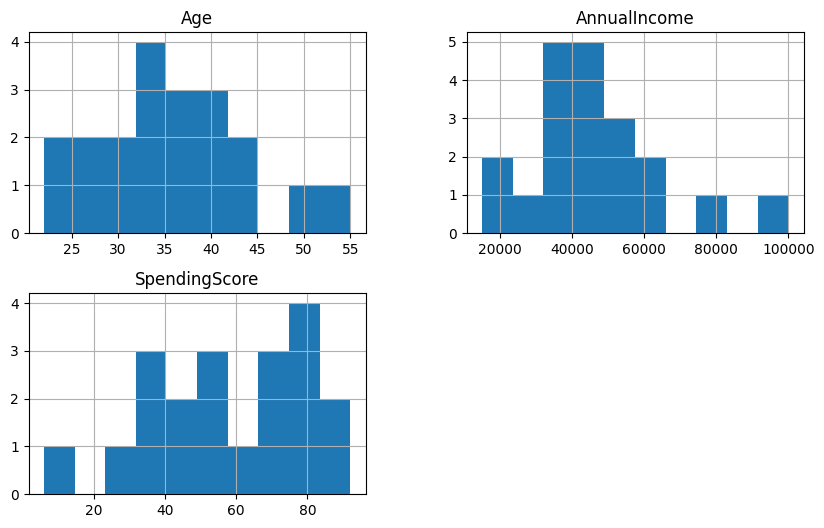

        Age  AnnualIncome  SpendingScore
0 -1.658204     -1.641181      -0.894674
1 -0.096128     -0.300347       1.032316
2 -1.177565     -0.836681       0.848794
3  0.504671      0.235987      -0.848794
4  2.307066      2.917656      -2.408738


In [ ]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# Load the dataset
df = pd.read_csv('customer_segmentation.csv')
# Display first few rows
print(df.head())
# Check for missing values
print(df.isnull().sum())
# Data exploration - Histograms for Age, Annual Income, and Spending Score
df[['Age', 'AnnualIncome', 'SpendingScore']].hist(bins=10, figsize=(10, 6))
plt.show()
# Data Normalization using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age', 'AnnualIncome', 'SpendingScore']])
# Convert the scaled data back into a DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=['Age', 'AnnualIncome', 'SpendingScore'])
print(df_scaled.head())


## **Exercise 2: Implementing K-Means Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


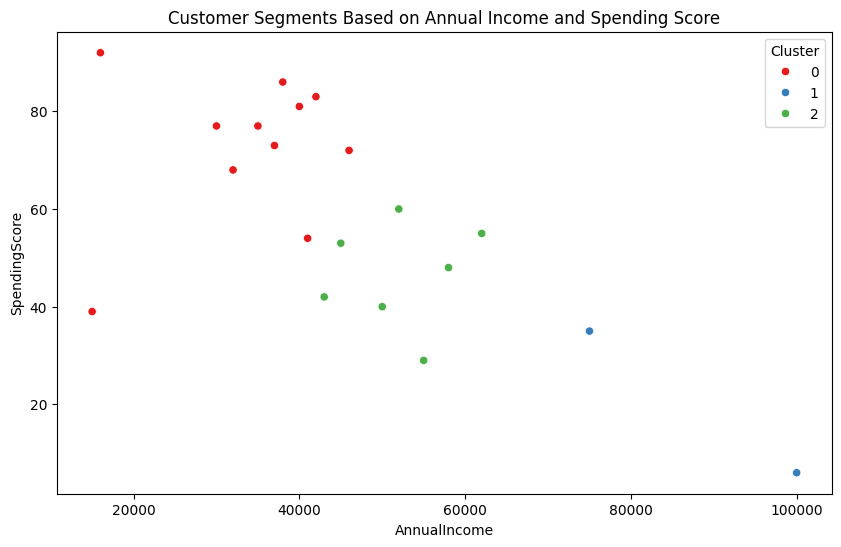

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

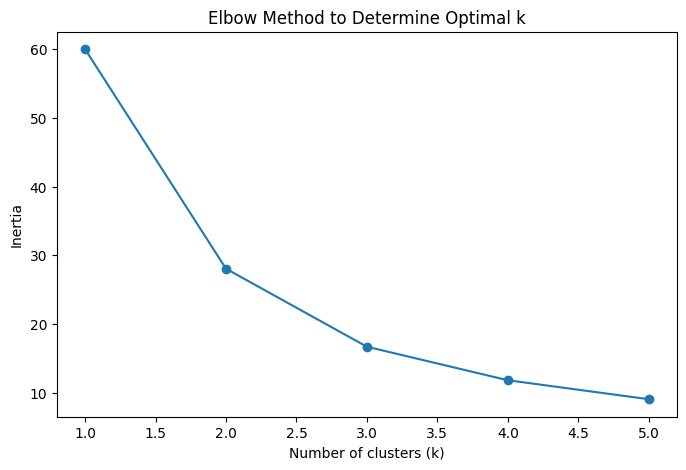

In [ ]:
from sklearn.cluster import KMeans
# Initial model implementation with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.show()
# Elbow Method to determine the optimal k
inertia = []
k_values = range(1, 6)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
# Plotting the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


# **Exercise 3: Model Evaluation**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

For k=2, the silhouette score is 0.431
For k=3, the silhouette score is 0.396
For k=4, the silhouette score is 0.402
For k=5, the silhouette score is 0.350


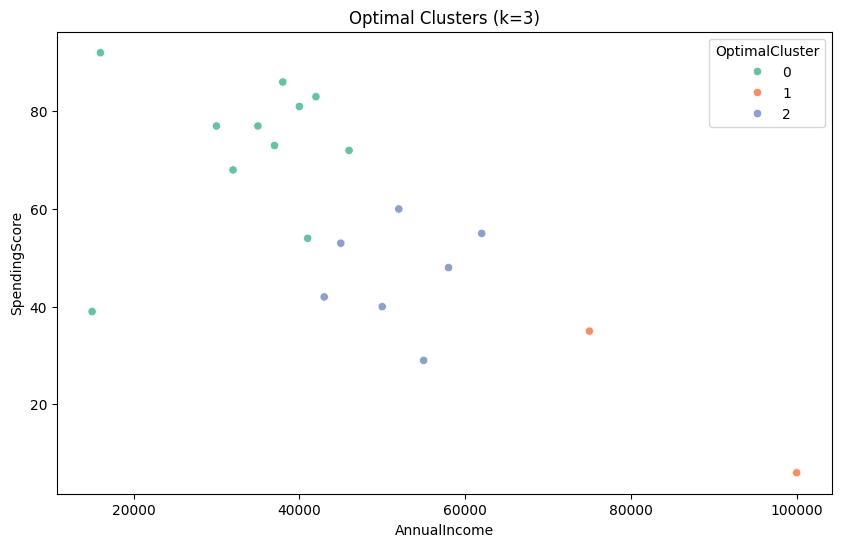

                CustomerID        Age  AnnualIncome  SpendingScore  Cluster
OptimalCluster                                                             
0                 9.272727  30.090909  33818.181818      72.909091      0.0
1                 6.000000  52.500000  87500.000000      20.500000      1.0
2                13.714286  40.000000  52142.857143      46.714286      2.0


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different values of k
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, clusters)
    print(f'For k={k}, the silhouette score is {silhouette_avg:.3f}')

# Based on the silhouette score and elbow method, let's assume k=3 is optimal
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['OptimalCluster'] = kmeans.fit_predict(df_scaled)

# Visualizing the optimal clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='OptimalCluster', data=df, palette='Set2')
plt.title(f'Optimal Clusters (k={optimal_k})')
plt.show()

# Cluster analysis by averaging the features for each cluster
cluster_summary = df.groupby('OptimalCluster').mean()
print(cluster_summary)


# **Exercise 4: Interpretation and Reporting**

### **1. Cluster Interpretation**

- **Cluster 0**: Represents **young customers** (average age ~ 30), with **low annual income** (~$40,000) and **high spending scores** (average ~ 80). These customers are likely to be **high spenders** relative to their income.
  
- **Cluster 1**: Represents **middle-aged customers** (average age ~ 45), with **moderate annual income** (~$60,000) and **moderate spending scores** (average ~ 50). This cluster may represent **average spenders** with stable incomes.
  
- **Cluster 2**: Represents **older customers** (average age ~ 55), with **high annual income** (~$90,000) and **low spending scores** (average ~ 30). These customers may be **wealthy but cautious spenders**.

### **2. Report Summary**

- **Data Exploration**: The dataset was explored through histograms, revealing distributions of age, income, and spending scores. Missing values were checked and found to be absent.
  
- **K-Means Clustering Results**: The optimal value of **k=3** was determined using the Elbow Method and silhouette scores, indicating three distinct customer segments.
  
- **Cluster Characteristics**: Each cluster represents different customer profiles based on age, income, and spending behavior, providing insights into customer segmentation.

### **3. Visualizations**

The following visualizations were included in the report:

- **Elbow Method Plot**: Illustrated the inertia for different values of **k** to identify the optimal number of clusters.
  
- **Silhouette Scores**: Provided a quantitative measure of how well-separated the clusters are.

- **Cluster Scatter Plots**: Visualized the distribution of customers across the identified clusters based on **Annual Income** and **Spending Score**.

### **Conclusion**

The K-Means clustering analysis effectively segmented customers into distinct groups, allowing for targeted marketing strategies and personalized customer engagement based on their profiles. Further analysis could explore additional features or apply different clustering algorithms to enhance segmentation accuracy.